**Name:**  <br />
**Roll No:** 
***
## Instructions

- **Release Date**: **15st Apr 2024**  
- **Deadline**: **23nd Apr 2024 11:59PM**
- Kindly name your submission files as `RollNo_Name_A1.ipynb`, based on the part you are submitting. Marks will be deducted for all submissions that do not follow the naming guidelines. <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through iPearl portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />

***


In [ ]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]


***
## Questions

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu_1 = \frac{1}{2}, \mu_2= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. In the Bernoulli bandit scenario the environment generates a binary reward (either 1 or 0) by flipping a coin with the true mean of the chosen arm as the bias.  

Let the time horizon be $T=10000$. `[20 Marks]`

### A1
Take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, you run the ETC algorithm to compute the sample regret
$$ \mu_2 * T - \sum_{t=1}^T R_t, $$
where $R_t$ is the reward obtained in time step $t$.

Repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments. `[5 Marks]`

In [6]:
## Solution for A1 problem ##

# Monte Carlo simulations
total_regrets = []

for _ in range(num_experiments):
    # Generate true means based on given values and arms
    mu1 = 1/2
    mu2 = 1/2 + delta

    # Initialize ETC algorithm parameters
    m = int(T**(2/3) * (np.log(T))**(1/3))
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0

    # Run ETC algorithm
    for t in range(1, T + 1):
        # Write code here for choosing the arm here for the ETC algorithm
        # [Hint] Explore each arm m times then -> Commit to the arm with the highest empirical mean
        # store the chosen arm in the variable chosen_arm
        # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            chosen_arm = np.argmax(empirical_means)

        # Observe the reward from the environment for the chosen arm
        reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

        # Update arm_counts and empirical_means for the chosen_arm
        # write code here
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update total regret based on reward recieved
        # write your code here
        # update the variable total_regret
        total_regret += mu2  - reward

    # Record total regrets over all the experiments
    total_regrets.append(total_regret)

# Calculate average regret
average_regret = np.mean(total_regrets)

print(f"Average Regret: {average_regret}")


Average Regret: 436.2839999998939


**Few Points Regarding ETC(Explore-Then-Commit) algorithm-**  <br />
The ETC (Explore-Then-Commit) algorithm is a bandit algorithm that explores each arm a certain number of times before committing to the arm with the highest estimated mean. In this case, the exploration parameter is set as $𝑚 = 𝑇^{2/3} (\log 𝑇)^{1/3}$.<br />


### A2

Repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$ and verify whether it satisfies the regret upper bound we derived in class. `[5 Marks]`

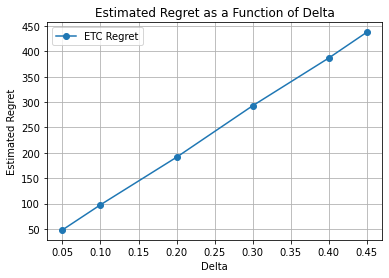

In [5]:
## Solution for A2 problem ##

# Initialize lists to store results
average_regrets_etc = []

for delta in delta_values:
    total_regrets = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Initialize ETC algorithm parameters
        m = int(T**(2/3) * (np.log(T))**(1/3))
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret = 0

        # Run ETC algorithm
        for t in range(1, T + 1):
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # write code here for choosing the arm here for the ETC algorithm
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            if t <= K * m:
                chosen_arm = (t - 1) % K
            else:
                # Commit to the arm with the highest empirical mean
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update arm_counts and empirical_means for the chosen_arm
            # write code here
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # write your code here
            # update the variable total_regret
            total_regret += mu2 - reward

        # Record total regret for this experiment
        total_regrets.append(total_regret)

    # Calculate average regret for this delta
    average_regret = np.mean(total_regrets)
    average_regrets_etc.append(average_regret)

# Plotting
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'ETC Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(average_regrets_etc)

[46.81799999998682, 97.36199999996208, 193.4059999999085, 289.64600000010233, 388.41599999980696, 437.32199999989393]


### A3
Repeat the experiment with the UCB algorithm and plot the comparison with ETC. `[10 Marks]`

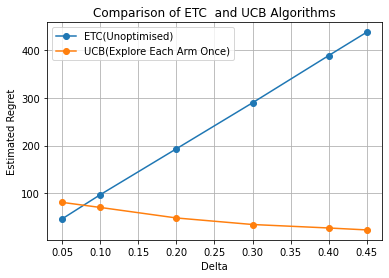

In [6]:
## Solution for A3 problem ##

# Initialize lists to store results
average_regrets_ucb = []

# UCB constant
c_ucb = np.sqrt(3/2)

for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Initialize UCB algorithm parameters
        empirical_means = np.zeros(K)
        arm_counts = np.ones(K)  # Explore each arm once
        total_regret_ucb = 0

        # Run UCB algorithm after exploring each arm once
        for t in range(K + 1, T + 1):
            # Calculate UCB for each arm
            # write your code here
            # [Hint] create and update a ucb_values numpy array same as the size of emperical_means
            ucb_values = empirical_means + c_ucb * np.sqrt(np.log(t) / (arm_counts + 1e-6))

            # Choose the arm with the highest UCB calculated above
            # write your code here
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            chosen_arm = np.argmax(ucb_values)

            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # write your code here
            # update the variable total_regret_ucb
            total_regret_ucb += mu2 - reward

        # Record total regret for this experiment
        total_regrets_ucb.append(total_regret_ucb)

    # Calculate average regret for this delta
    average_regret_ucb = np.mean(total_regrets_ucb)
    average_regrets_ucb.append(average_regret_ucb)

# Comparison of ETC and UCB algorithm.
plt.plot(delta_values, average_regrets_etc, marker='o', label='ETC(Unoptimised)')
plt.plot(delta_values, average_regrets_ucb, marker='o', label='UCB(Explore Each Arm Once)')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Comparison of ETC and UCB Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(average_regrets_ucb)

[85.98199999999258, 73.45999999998538, 42.72800000001098, 31.315999999991714, 27.45999999999551, 26.958000000003143]


**The Upper Confidence Bound (UCB) algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and an exploration term. The exploration term is designed to account for uncertainty in the estimates of arm means. Here's how UCB works:

Assuming we have two arms with true means $\mu_1 = \frac{1}{2}$ and $\mu_2 = \frac{1}{2} + \frac{1}{4}$, and a time horizon $T = 10000$, the UCB algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $i$, set the empirical mean $Q_i$ to $0$ and the count $N_i$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- For each arm $i$, calculate the Upper Confidence Bound (UCB) for that arm:
  $$ UCB_i(t) = Q_i(t) + c \sqrt{\frac{\log(t)}{N_i(t)}} $$
  where:
  - $Q_i(t)$ is the empirical mean of arm $i$ at time $t$.
  - $N_i(t)$ is the count of arm $i$ at time $t$.
  - $c$ is a constant that determines the level of exploration.
- Choose the arm with the highest UCB: $ \text{chosen_arm} = \underset{i}{\text{arg max}} UCB_i(t) $

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ Q_{\text{chosen_arm}}(t + 1) = \frac{Q_{\text{chosen_arm}}(t) \cdot N_{\text{chosen_arm}}(t) + R_t}{N_{\text{chosen_arm}}(t) + 1} $$
$$ N_{\text{chosen_arm}}(t + 1) = N_{\text{chosen_arm}}(t) + 1 $$


**Repeat until $t = T$.**

The constant $c$ in the UCB formula controls the trade-off between exploration and exploitation. A common choice is $c = \sqrt{3/2}$.


### A4
(**Bonus**) In the ETC algorithm, assume that we know $\Delta$, and choose a better $m$ as function of $\Delta$ and repeat the experiments and compare with UCB. What do you observe?

**Optimal m using the known value of Δ :**

To optimize the Explore-Then-Commit (ETC) algorithm with respect to the known value of Δ, we can choose a better exploration parameter $m$ as a function of Δ. The goal is to find an $m$ such that, with high probability, the estimated mean difference $ϵ$ between the two arms is less than Δ/2. It turns out that the optimal $m$ is given by:

$$m \geq \frac{2\log(4T)}{\Delta^2}$$

Solving this inequality for $m$ gives us an idea of how many exploration steps are needed to achieve a high probability of having accurate estimates. `[5 Marks]`

NameError: name 'average_regrets_ucb' is not defined

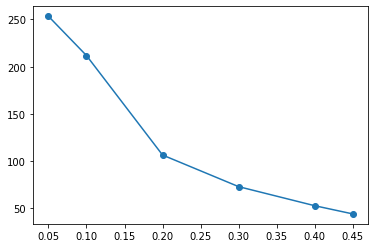

In [7]:
## Solution for A4 Problem ##

# Write here your modification to the code that includes this consideration for the ETC algorithm:

# Initialize lists to store results
average_regrets_etc_optimized = []

for delta in delta_values:
    total_regrets_etc_optimized = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu1 = 0.5
        mu2 = 0.5 + delta

        # Calculate optimized m based on the formula given
        m_optimized = int(np.log(4 * T) / (2 * (delta/2)**2))

        # Initialize ETC algorithm parameters with optimized m
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret_etc_optimized = 0

        # Run ETC algorithm with optimized m
        for t in range(1, T + 1):
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # write code here for choosing the arm here for the ETC algorithm
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            if t <= K * m_optimized:
                chosen_arm = (t - 1) % K
            else:
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward
            reward = np.random.binomial(1, mu1 if chosen_arm == 0 else mu2)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # write your code here
            # update the variable total_regret_etc_optimized
            total_regret_etc_optimized += mu2  - reward

        # Record total regret for this experiment
        total_regrets_etc_optimized.append(total_regret_etc_optimized)

    # Calculate average regret for this delta
    average_regret_etc_optimized = np.mean(total_regrets_etc_optimized)
    average_regrets_etc_optimized.append(average_regret_etc_optimized)

# Final plot containing all the Algorithm's estimated regret vs delta
plt.plot(delta_values, average_regrets_etc_optimized, marker='o', label='ETC (Optimized)')
plt.plot(delta_values, average_regrets_ucb, marker='o', label='UCB')
plt.plot(delta_values, average_regrets_etc, marker='o',label='ETC (Unoptimised)')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Comparison of ETC (Optimized) and UCB Algorithms')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion, what do you observe?:** <br />
The results demonstrate a common phenomenon. If ETC is tuned with the
optimal choice of commitment time for each choice of ∆ then it can match the outcomes of the parameter-free UCB, though only by a relatively small margin. If, however,
the commitment time must be chosen without the knowledge of ∆, for ∆ getting
large, or for ∆ being bounded, n getting large, UCB arbitrarily outperforms
ETC.

